<a href="https://colab.research.google.com/github/j-aakarsh/data-analyst/blob/main/group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BUSI 651/CreditPrediction.csv'

# Data Visualisation and description (Slide 1) Aakarsh Jain Group Project

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
dataset = pd.read_csv(path)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10167.0,7.391864e+08,3.690366e+07,708082083.0,7.130407e+08,7.179400e+08,7.731435e+08,8.283431e+08
Customer_Age,10167.0,4.675382e+01,1.352051e+01,26.0,4.100000e+01,4.600000e+01,5.200000e+01,3.523305e+02
Dependent_count,10167.0,2.346513e+00,1.298701e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,9944.0,3.591342e+01,7.980102e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10147.0,3.813245e+00,1.554741e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10167.0,2.341595e+00,1.010502e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10167.0,2.455887e+00,1.105580e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10167.0,8.632552e+03,9.087334e+03,1438.3,2.556500e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10167.0,1.162177e+03,8.150826e+02,0.0,3.485000e+02,1.276000e+03,1.783000e+03,2.517000e+03
Total_Amt_Chng_Q4_Q1,10167.0,7.597215e-01,2.190539e-01,0.0,6.310000e-01,7.360000e-01,8.590000e-01,3.397000e+00


#Empty Cell detection

In [ ]:
#empty cell identification
empty_cells = dataset.isnull().sum()

# Displaying columns with missing values before handling
print("Columns with empty cells:")
print(empty_cells[empty_cells > 0])

Columns with empty cells:
Gender                        199
Marital_Status               1950
Card_Category                1924
Months_on_book                223
Total_Relationship_Count       20
Unnamed: 19                 10167
dtype: int64


Convert categorical data to numerical

In [ ]:
label_encoder = LabelEncoder()
for column in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    dataset[column] = label_encoder.fit_transform(dataset[column])
dataset.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,1,3,3,1,2,0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,0,5,2,4,4,0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,1,3,2,1,3,0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,0,4,3,4,4,0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,1,3,5,1,2,4,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


Removing unwanted rows

In [ ]:
#Eliminating the extra coulmn
dataset.drop(columns=['CLIENTNUM', 'Unnamed: 19'], inplace=True)

#Correlation Matrix

In [ ]:
df = pd.DataFrame(dataset)

# Display the first few rows of the dataset
df.head()

# Calculate correlation matrix
correlation = df.corr()

# Print correlation matrix (consider rounding for better readability)
print(correlation.round(2))

                          Customer_Age  Gender  Dependent_count  \
Customer_Age                      1.00    0.00            -0.08   
Gender                            0.00    1.00             0.01   
Dependent_count                  -0.08    0.01             1.00   
Education_Level                  -0.00   -0.00             0.00   
Marital_Status                    0.01   -0.01             0.00   
Income_Category                  -0.02   -0.48            -0.04   
Card_Category                    -0.01    0.04             0.01   
Months_on_book                    0.50   -0.01            -0.10   
Total_Relationship_Count         -0.02    0.00            -0.04   
Months_Inactive_12_mon            0.03   -0.00            -0.01   
Contacts_Count_12_mon             0.01    0.04            -0.04   
Credit_Limit                      0.00    0.38             0.07   
Total_Revolving_Bal               0.01    0.03            -0.00   
Total_Amt_Chng_Q4_Q1             -0.05    0.03            -0.0

In [ ]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.IntSlider(
    min=0,
    max=13,
    step=1,
    description="Select the number of highest correlation you want to see:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(w)

w = int(w.value)


IntSlider(value=0, continuous_update=False, description='Select the number of highest correlation you want to …

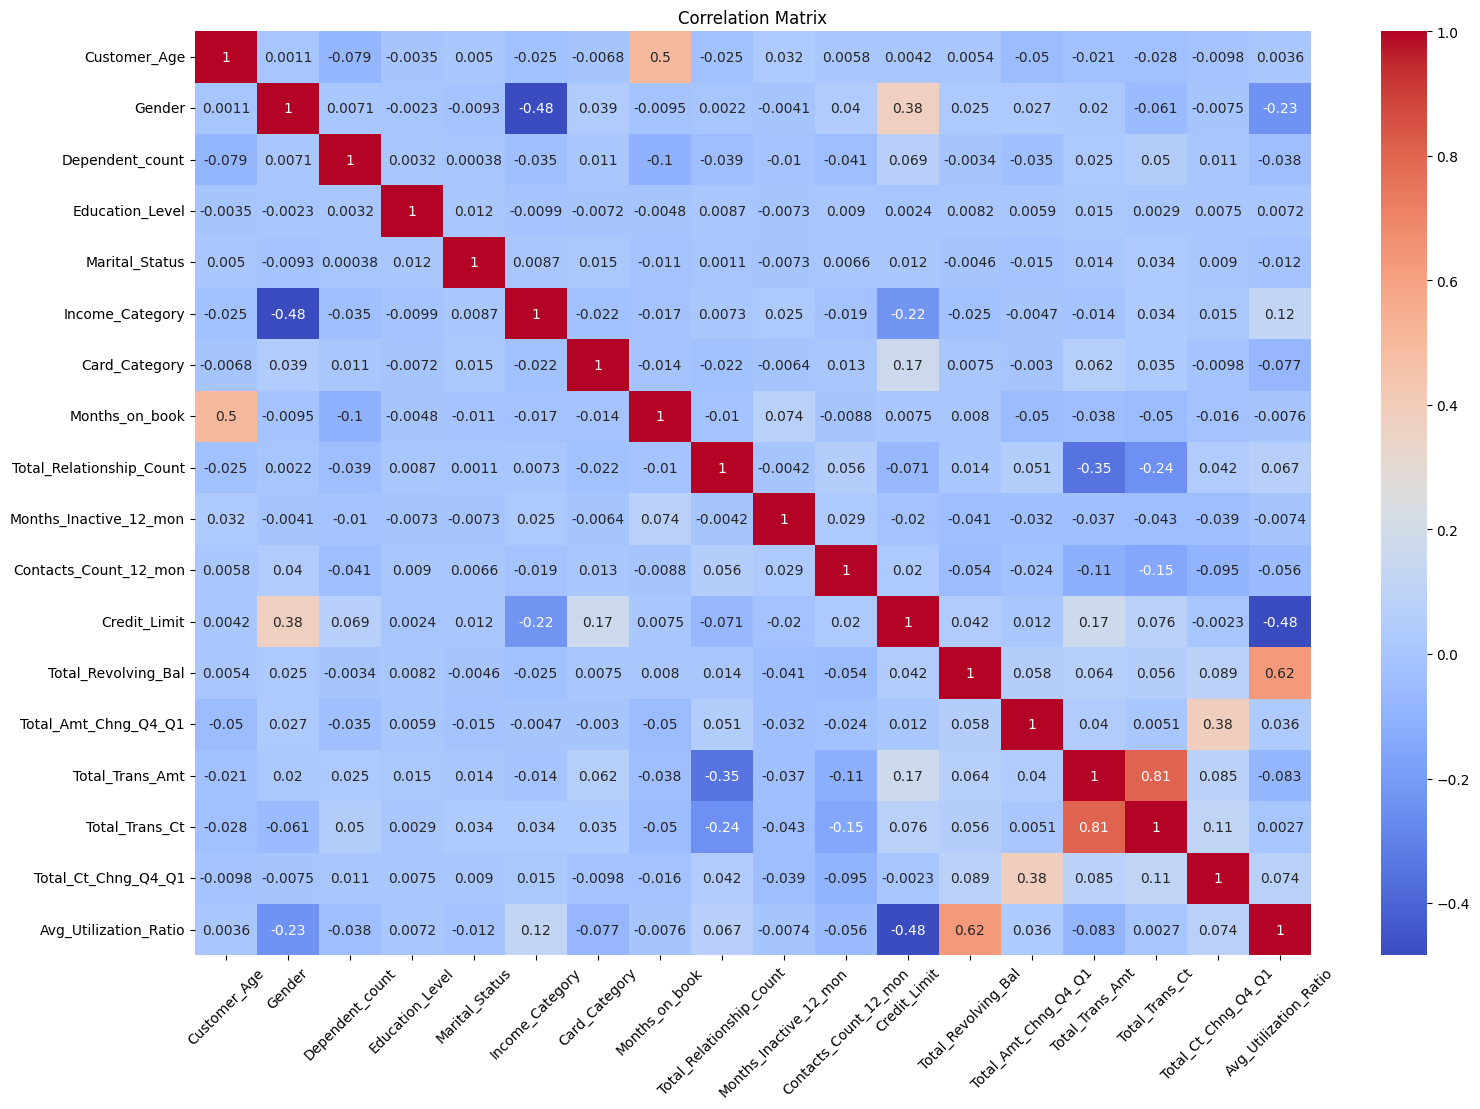

In [ ]:

# Sort absolute correlation values (ignoring sign)
# Considering absolute values for identifying strongest correlations (positive or negative)
abs_corr = correlation.abs()

# Sort the correlation matrix by the upper triangle (excluding self-correlations)
# Setting 'ascending=False' to sort in descending order (highest first)
sorted_corr = abs_corr.where(~np.tril(np.ones(abs_corr.shape)).astype(bool)) \
                 .stack() \
                 .sort_values(ascending=False)

# Get the top N highest correlations (replace 3 with your desired number)
top_n_corr = sorted_corr.head(w)

plt.figure(figsize=(18, 12))  # Set the figure size
# Print the top correlations with corresponding features
for index, value in top_n_corr.items():
    feature1, feature2 = index
    print(f"Correlation between {feature1} and {feature2}: {value:.2f}")
# Create a heatmap with color gradient
sns_plot = sns.heatmap(correlation, annot=True, cmap="coolwarm")  # Annotate values and choose colormap

# Customize plot (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Display the plot
plt.show()

Outliers detection and removal

In [ ]:
# Define numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                      'Total_Relationship_Count', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, len(outliers)

# Count outliers for all numerical features
outliers_count_dict = {}
for feature in numerical_features:
    _, count = remove_outliers(dataset, feature)
    outliers_count_dict[feature] = count


outliers_count_df = pd.DataFrame(list(outliers_count_dict.items()), columns=['Feature', 'Outliers_Count'])

# Display the outliers count for all features
display(outliers_count_df)

,Feature,Outliers_Count
0,Customer_Age,19
1,Dependent_count,0
2,Months_on_book,577
3,Total_Relationship_Count,0
4,Months_Inactive_12_mon,332
5,Contacts_Count_12_mon,630
6,Credit_Limit,987
7,Total_Revolving_Bal,0
8,Total_Amt_Chng_Q4_Q1,396
9,Total_Trans_Amt,898


Filling Empty cells

In [ ]:
for column in ['Gender', 'Marital_Status', 'Card_Category', 'Education_Level']:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

# Impute remaining missing values for numerical columns with the median
for column in numerical_features:
    dataset[column].fillna(dataset[column].median(), inplace=True)

Recount Outliers

In [ ]:


# Count outliers for all numerical features
outliers_count_dict = {}
for feature in numerical_features:
    _, count_again = remove_outliers(dataset, feature)
    outliers_count_dict[feature] = count_again


outliers_count_again_df = pd.DataFrame(list(outliers_count_dict.items()), columns=['Feature', 'Outliers_Count'])

# Display the outliers count for all features
display(outliers_count_again_df)

,Feature,Outliers_Count
0,Customer_Age,19
1,Dependent_count,0
2,Months_on_book,577
3,Total_Relationship_Count,0
4,Months_Inactive_12_mon,332
5,Contacts_Count_12_mon,630
6,Credit_Limit,987
7,Total_Revolving_Bal,0
8,Total_Amt_Chng_Q4_Q1,396
9,Total_Trans_Amt,898


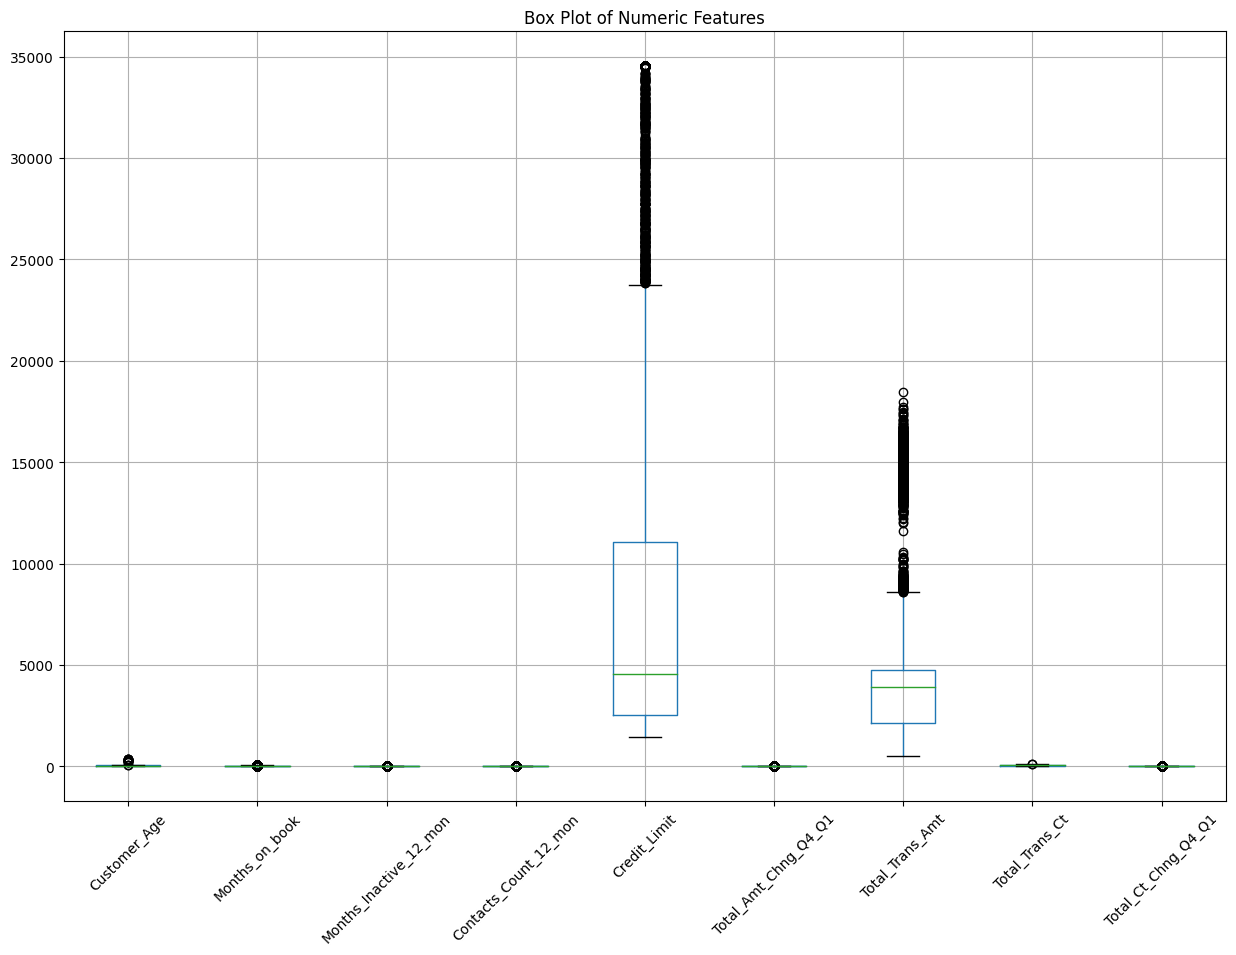

In [ ]:
plt.figure(figsize=(15, 10))
dataset[['Customer_Age', 'Months_on_book',
                      'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1']].boxplot() # Pass a list of column names within square brackets
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Features')
plt.show()

Removing Outliers of Age(unrealistic data) and Credit Limit(premium customers with high credit limit)

In [ ]:


# Remove outliers from 'Credit_Limit' feature
data_cleaned1, credit_limit_outliers_count = remove_outliers(dataset, 'Credit_Limit')
#data_cleaned, customer_age_outliers_count = remove_outliers(dataset,'Customer_Age')

# Display the outliers count for all features
outliers_count_again1_df = pd.DataFrame(list(outliers_count_dict.items()), columns=['Feature', 'Outliers_Count'])
display(outliers_count_again1_df)

# Display the number of outliers removed from Credit_Limit
print(f"Number of outliers removed from Credit_Limit: {credit_limit_outliers_count}")
#print(f"Number of outliers removed from Credit_Limit: {customer_age_outliers_count}")

,Feature,Outliers_Count
0,Customer_Age,19
1,Dependent_count,0
2,Months_on_book,577
3,Total_Relationship_Count,0
4,Months_Inactive_12_mon,332
5,Contacts_Count_12_mon,630
6,Credit_Limit,987
7,Total_Revolving_Bal,0
8,Total_Amt_Chng_Q4_Q1,396
9,Total_Trans_Amt,898


Number of outliers removed from Credit_Limit: 987


In [ ]:
display(data_cleaned1)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45.0,1,3,3,1,2,0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,49.0,0,5,2,4,4,0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,51.0,1,3,2,1,3,0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,40.0,0,4,3,4,4,0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,40.0,1,3,5,1,2,4,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,1,3,1,4,3,0,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112
10163,46.0,0,1,6,2,4,0,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529
10164,52.0,1,0,6,4,2,0,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796
10165,39.0,0,1,3,4,5,4,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421


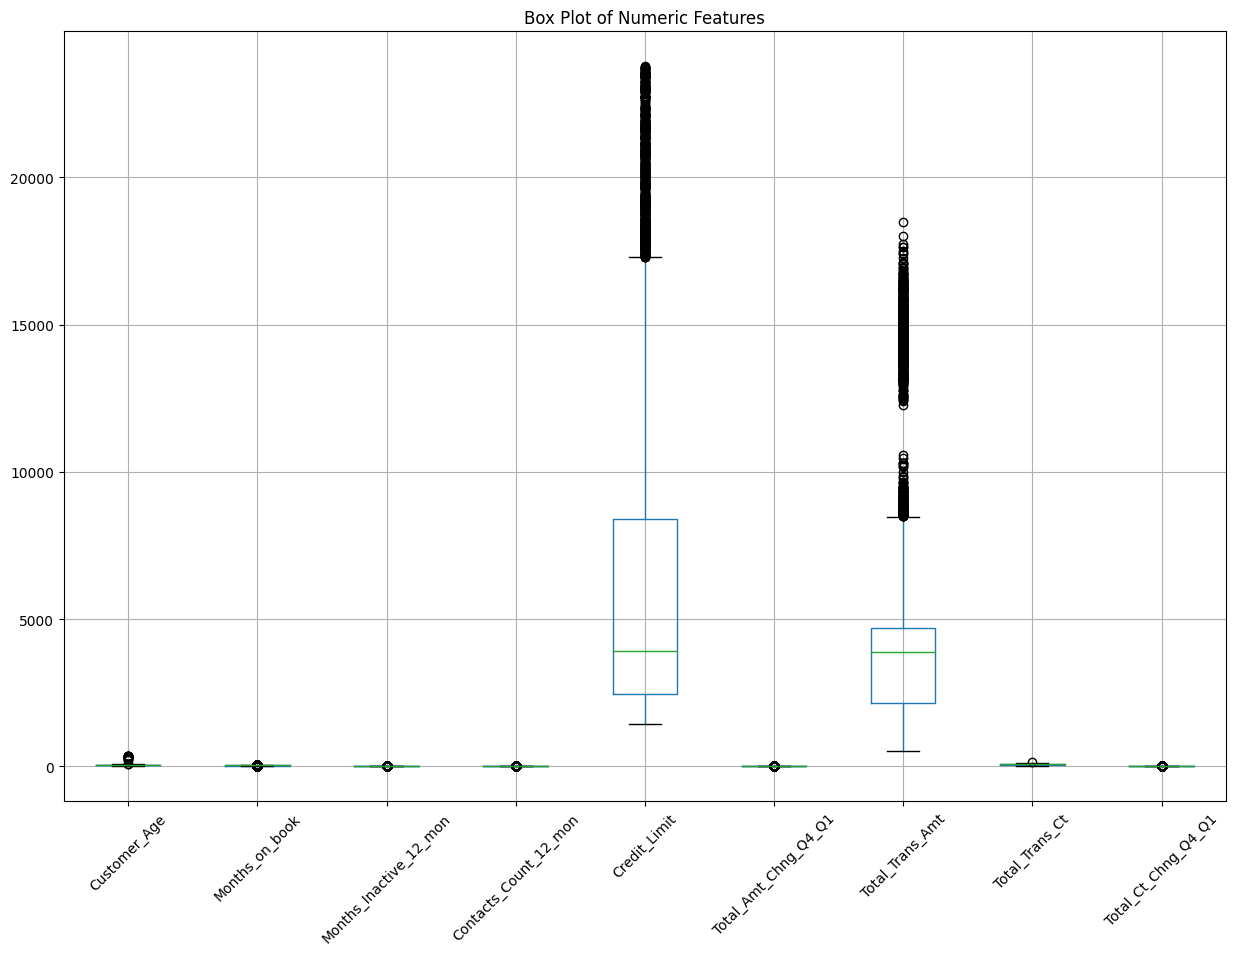

In [ ]:
plt.figure(figsize=(15, 10))
data_cleaned1[['Customer_Age', 'Months_on_book',
                      'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1']].boxplot() # Pass a list of column names within square brackets
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Features')
plt.show()

In [ ]:
# Remove outliers from 'Credit_Limit' feature

data_cleaned, customer_age_outliers_count = remove_outliers(data_cleaned1,'Customer_Age')

# Display the outliers count for all features
outliers_count_again2_df = pd.DataFrame(list(outliers_count_dict.items()), columns=['Feature', 'Outliers_Count'])
display(outliers_count_again2_df)

# Display the number of outliers removed from Credit_Limit
print(f"Number of outliers removed from Credit_Limit: {customer_age_outliers_count}")

,Feature,Outliers_Count
0,Customer_Age,19
1,Dependent_count,0
2,Months_on_book,577
3,Total_Relationship_Count,0
4,Months_Inactive_12_mon,332
5,Contacts_Count_12_mon,630
6,Credit_Limit,987
7,Total_Revolving_Bal,0
8,Total_Amt_Chng_Q4_Q1,396
9,Total_Trans_Amt,898


Number of outliers removed from Credit_Limit: 17


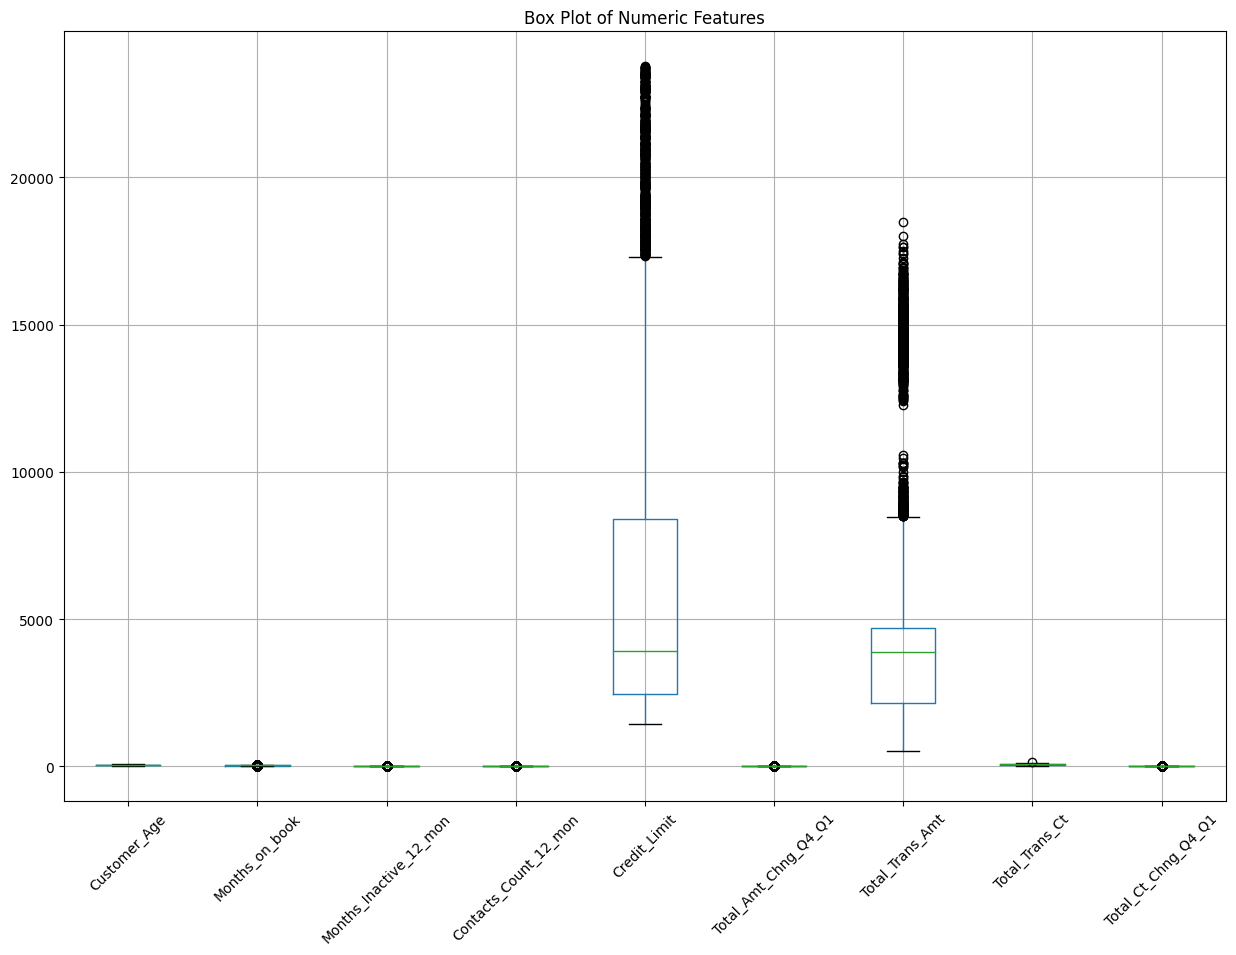

In [ ]:
plt.figure(figsize=(15, 10))
data_cleaned[['Customer_Age', 'Months_on_book',
                      'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1']].boxplot() # Pass a list of column names within square brackets
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Features')
plt.show()

Summarise cleaned dataset

In [ ]:
data_cleaned.info()
#empty cell identification
empty_cells = data_cleaned.isnull().sum()

# Displaying columns with missing values before handling
print("Columns with empty cells:")
print(empty_cells[empty_cells > 0])

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 0 to 10166
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9163 non-null   float64
 1   Gender                    9163 non-null   int64  
 2   Dependent_count           9163 non-null   int64  
 3   Education_Level           9163 non-null   int64  
 4   Marital_Status            9163 non-null   int64  
 5   Income_Category           9163 non-null   int64  
 6   Card_Category             9163 non-null   int64  
 7   Months_on_book            9163 non-null   float64
 8   Total_Relationship_Count  9163 non-null   float64
 9   Months_Inactive_12_mon    9163 non-null   int64  
 10  Contacts_Count_12_mon     9163 non-null   int64  
 11  Credit_Limit              9163 non-null   float64
 12  Total_Revolving_Bal       9163 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      9163 non-null   float64
 14  Total_Trans_

#Feature Engineering

In [ ]:
selected_features = ['Customer_Age', 'Gender', 'Income_Category', 'Months_on_book',
                     'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal','Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Creation of new features
# Interaction term between 'Total_Trans_Amt' and 'Credit_Limit' called as 'Utilization ratio'
data_cleaned['Util_Ratio'] = data_cleaned['Total_Trans_Amt'] / data_cleaned['Credit_Limit']
data_cleaned['change_Credit_Limit_utilization'] = (data_cleaned['Total_Amt_Chng_Q4_Q1'])*((data_cleaned['Total_Trans_Amt']-1) )/data_cleaned['Credit_Limit']

# Updated list of features after creating new feature
selected_features.append('Util_Ratio')
selected_features.append('change_Credit_Limit_utilization')

# Display the updated list of features
display(selected_features)

# Select the final set of features
final_data = data_cleaned[selected_features]


# Display the processed data overview
display(final_data.head(10))

<ipython-input-131-2b160505d6cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Util_Ratio'] = data_cleaned['Total_Trans_Amt'] / data_cleaned['Credit_Limit']
<ipython-input-131-2b160505d6cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['change_Credit_Limit_utilization'] = (data_cleaned['Total_Amt_Chng_Q4_Q1'])*((data_cleaned['Total_Trans_Amt']-1) )/data_cleaned['Credit_Limit']


['Customer_Age',
 'Gender',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Util_Ratio',
 'change_Credit_Limit_utilization']

,Customer_Age,Gender,Income_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Util_Ratio,change_Credit_Limit_utilization
0,45.0,1,2,39.0,5.0,12691.0,777,1144,1.335,1.625,0.061,0.090143,0.120235
1,49.0,0,4,44.0,6.0,8256.0,864,1291,1.541,3.714,0.105,0.156371,0.240781
2,51.0,1,3,36.0,4.0,3418.0,0,1887,2.594,2.333,0.000,0.552077,1.431329
3,40.0,0,4,34.0,3.0,3313.0,2517,1171,1.405,2.333,0.760,0.353456,0.496182
4,40.0,1,2,21.0,5.0,4716.0,0,816,2.175,2.500,0.000,0.173028,0.375875
5,44.0,1,1,36.0,3.0,4010.0,1247,1088,1.376,0.846,0.311,0.271322,0.372996
8,37.0,1,2,36.0,5.0,22352.0,2517,1350,3.355,1.182,0.113,0.060397,0.202483
9,48.0,1,3,36.0,6.0,11656.0,1677,1441,1.524,0.882,0.144,0.123627,0.188277
10,42.0,1,0,31.0,5.0,6748.0,1467,1201,0.831,0.680,0.217,0.177979,0.147777
11,65.0,1,1,54.0,6.0,9095.0,1587,1314,1.433,1.364,0.174,0.144475,0.206875


#Multiple linear regression to predict 'Gender' of customer (having more correlation and more empty cells)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

dff = pd.DataFrame(final_data)
# Separate features and target
X = dff.drop('Gender', axis=1)
y = dff["Gender"]>0.01


# Build and fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Make predictions
Gender_new = linear_reg.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y, Gender_new)
mse = mean_squared_error(y, Gender_new)
rmse = np.sqrt(mse)
r2 = r2_score(y, Gender_new)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2) Score: {r2:.2f}")

feature_names = X.columns
coefficients = linear_reg.coef_
coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print(coefficient_df)


Mean Absolute Error (MAE): 0.35
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE): 0.45
R-squared (R^2) Score: 0.29
                            Feature  Coefficient
0                      Customer_Age    -0.001480
1                   Income_Category    -0.153527
2                    Months_on_book    -0.000500
3          Total_Relationship_Count     0.004446
4                      Credit_Limit     0.000018
5               Total_Revolving_Bal     0.000015
6                   Total_Trans_Amt     0.000002
7              Total_Amt_Chng_Q4_Q1     0.024711
8               Total_Ct_Chng_Q4_Q1    -0.007724
9             Avg_Utilization_Ratio    -0.085244
10                       Util_Ratio    -0.084741
11  change_Credit_Limit_utilization     0.041831


^ The above results are not useful so we will not replace the data

#data normalization for K-mean

In [ ]:
from sklearn import preprocessing

final_data_norm = preprocessing.normalize(final_data)


<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Util_Ratio'>

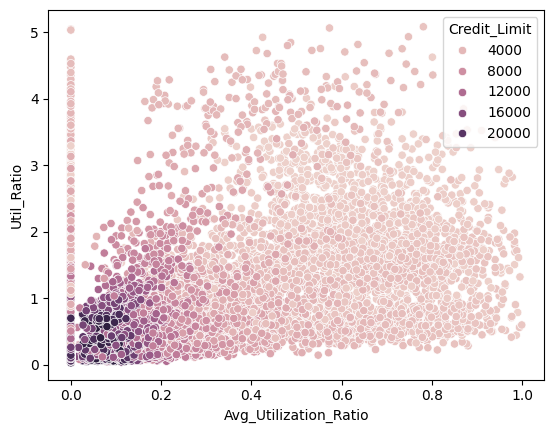

In [ ]:
import seaborn as sns
sns.scatterplot(data = final_data, x = 'Avg_Utilization_Ratio', y = 'Util_Ratio', hue = 'Credit_Limit')


In [ ]:
final_data_norm


array([[3.52491503e-03, 7.83314451e-05, 1.56662890e-04, ...,
        4.77821815e-06, 7.06100175e-06, 9.41819745e-06],
       [5.83254322e-03, 0.00000000e+00, 4.76125977e-04, ...,
        1.24983069e-05, 1.86130886e-05, 2.86605520e-05],
       [1.30608621e-02, 2.56095336e-04, 7.68286007e-04, ...,
        0.00000000e+00, 1.41384406e-04, 3.66556791e-04],
       ...,
       [1.00158477e-02, 1.92612456e-04, 3.85224912e-04, ...,
        1.53319515e-04, 2.68969035e-04, 1.59188083e-04],
       [6.83672724e-03, 0.00000000e+00, 8.76503493e-04, ...,
        7.38015941e-05, 3.09755251e-04, 2.54256745e-04],
       [2.61009474e-03, 5.01941297e-05, 1.00388259e-04, ...,
        5.67193666e-06, 2.05556130e-05, 1.47569646e-05]])

In [ ]:
from sklearn.cluster import KMeans
K = range(2, 8)
wcss = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, n_init='auto').fit(final_data_norm)

    # Append the within-cluster sum of square to wcss
    wcss.append(model.inertia_)

<Axes: >

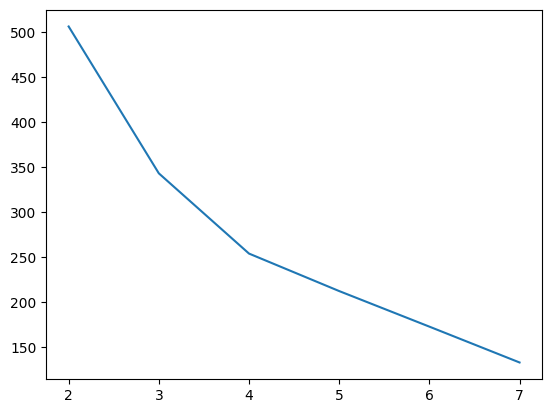

In [ ]:
sns.lineplot(x=K, y=wcss)

In [ ]:
kk = widgets.IntSlider(
    min=0,
    max=13,
    step=1,
    description="Select the number of highest correlation you want to see:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(kk)



IntSlider(value=0, continuous_update=False, description='Select the number of highest correlation you want to …

In [ ]:
kk = int(kk.value)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=kk, n_init='auto')
kmeans.fit(final_data_norm)


KMeans(n_clusters=4, n_init='auto')

In [ ]:

kmeans.labels_

array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

In [ ]:
final_data = pd.DataFrame(final_data)
final_data['Cluster'] = kmeans.labels_
print(final_data.columns)

sns.scatterplot(final_data, x='Income_Category', y=kmeans.labels_)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Cluster'], dtype='object')


ValueError: Could not interpret value `Income_Category` for `x`. An entry with this name does not appear in `data`.

In [ ]:
data_cleaned['Cluster'] = kmeans.labels_
cluster_1 = data_cleaned[data_cleaned['Cluster'] == 0]
cluster_2 = data_cleaned[data_cleaned['Cluster'] == 1]
cluster_3 = data_cleaned[data_cleaned['Cluster'] == 2]
cluster_4 = data_cleaned[data_cleaned['Cluster'] == 3]



cluster_1.to_csv('cluster_1.csv', index = False)
cluster_2.to_csv('cluster_2.csv', index = False)
cluster_3.to_csv('cluster_3.csv', index = False)
cluster_4.to_csv('cluster_4.csv', index = False)


<ipython-input-159-2eacf69b9a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.labels_


In [ ]:
from collections import Counter

# Assuming you performed KMeans clustering and have labels stored in 'kmeans.labels_'
cluster_counts = Counter(kmeans.labels_)

# Print cluster counts
print(cluster_counts)

Counter({1: 3286, 3: 2756, 0: 1778, 2: 1343})
